In [18]:
# 读取数据
import numpy as np
import pandas as pd

df = pd.read_csv(
    "E:\Workspace\jupyter_notebook\\notebook_idata_lesson01\PCA\iris.data",
    names=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
)
df.head()


,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
# 特征
x = df.iloc[:, 0:4].values
# 标签
y = df.iloc[:, 4].values
print(x[0])
print(y[0])


[5.1 3.5 1.4 0.2]
Iris-setosa


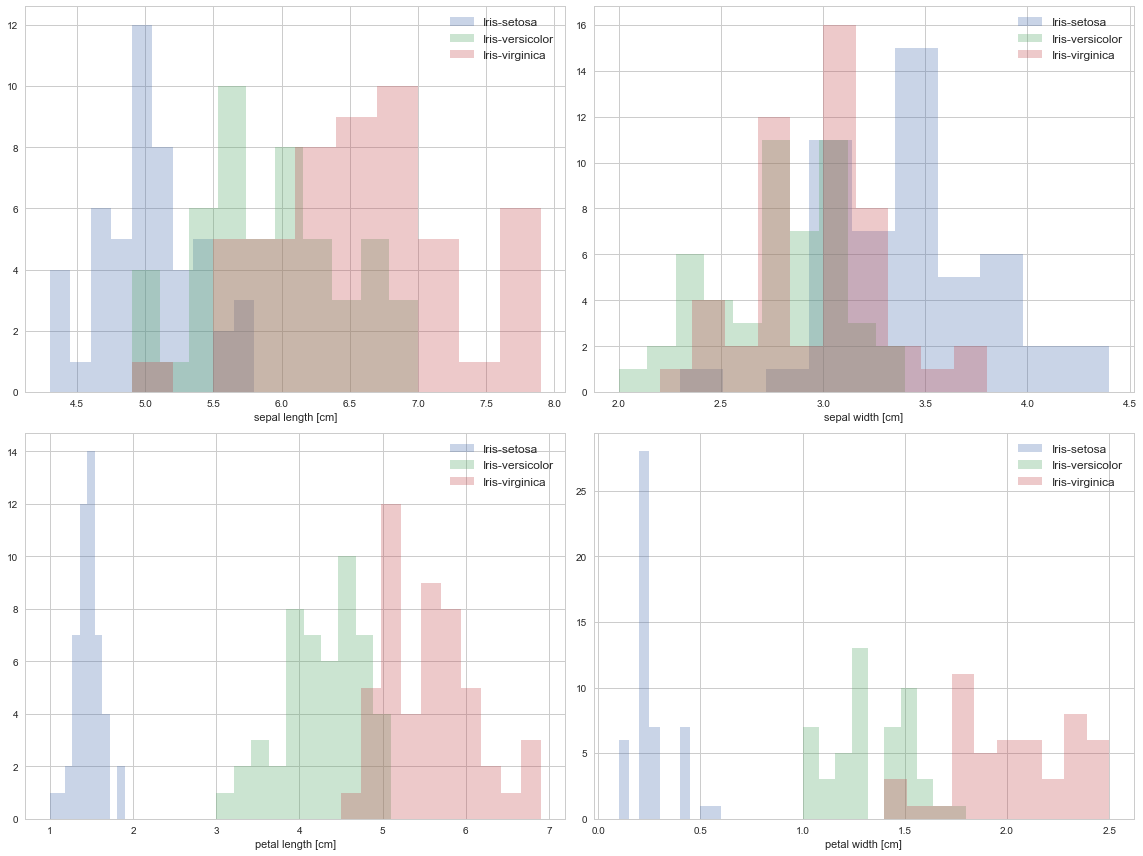

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns
% matplotlib inline

sns.set_style("whitegrid")

label_dict = {1: "Iris-Setosa", 2: "Iris-Versicolor", 3: "Iris-Virgnica"}
feature_dict = {0: "sepal length [cm]", 1: "sepal width [cm]", 2: "petal length [cm]", 3: "petal width [cm]"}

plt.figure(figsize=(16, 12))
for cnt in range(4):
    plt.subplot(2, 2, cnt + 1)
    for lab in ("Iris-setosa", "Iris-versicolor", "Iris-virginica"):
        plt.hist(x[y == lab, cnt], label=lab, bins=10, alpha=0.3)

    plt.xlabel(feature_dict[cnt])
    plt.legend(loc="upper right", fancybox=True, fontsize=12)

plt.tight_layout()
plt.show()


In [33]:
# 数据标准化
from sklearn.preprocessing import StandardScaler

x_std = StandardScaler().fit_transform(x)
print(x_std[:5])


[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


In [44]:
# 求协方差
mean_vec = np.mean(x_std, axis=0)
cov_mat = (x_std - mean_vec).T.dot(x_std - mean_vec) / (x_std.shape[0] - 1)
print(cov_mat)


[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [48]:
# 使用numpy计算协方差
cov_mat = np.cov(x_std.T)
print(cov_mat)


[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [50]:
# 计算特征值和特征向量
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' % eig_vecs)
print('\nEigenvalues \n%s' % eig_vals)


Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [51]:
# 根据特征值排列
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])


Eigenvalues in descending order:
2.930353775589315
0.9274036215173407
0.1483422264816398
0.02074601399559622


In [53]:
# 把数据从4维降到2维，所以取前两个特征值对应的特征向量做计算
matrix_w = np.hstack((eig_pairs[0][1].reshape(4, 1),
                      eig_pairs[1][1].reshape(4, 1)))
print('Matrix W:\n', matrix_w)


Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [55]:
x_pac = x_std.dot(matrix_w)
x_pac[:5]


array([[-2.26454173, -0.5057039 ],
       [-2.0864255 ,  0.65540473],
       [-2.36795045,  0.31847731],
       [-2.30419716,  0.57536771],
       [-2.38877749, -0.6747674 ]])

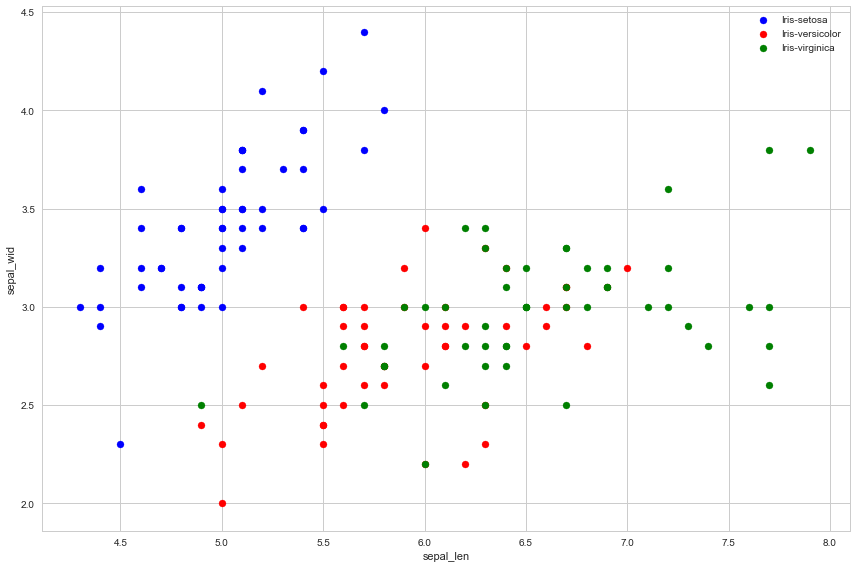

In [58]:
# 原本数据的散点图
plt.figure(figsize=(12, 8))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                    ('blue', 'red', 'green')):
    plt.scatter(x[y == lab, 0],
                x[y == lab, 1],
                label=lab,
                c=col)
plt.xlabel('sepal_len')
plt.ylabel('sepal_wid')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


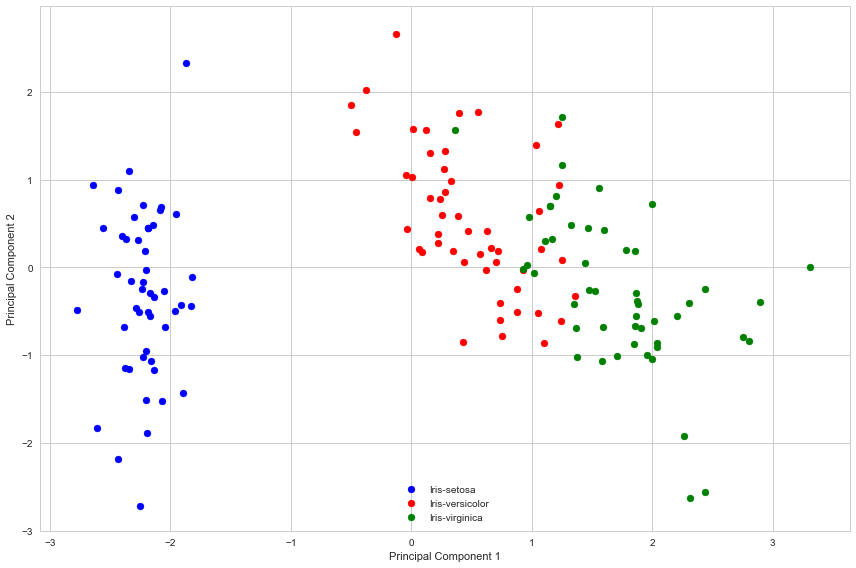

In [59]:
# pac降维之后的散点图
plt.figure(figsize=(12, 8))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                    ('blue', 'red', 'green')):
    plt.scatter(x_pac[y == lab, 0],
                x_pac[y == lab, 1],
                label=lab,
                c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

# 可以看到和原本数据的图作比较，
# 降维之后，数据的表现更清晰了，比原始数据更明显
# 但是这个时候，我们也已经不能知道降维之后的数据的意义了
